In [41]:
# import h5py
# import matplotlib.pyplot as plt

# PATH = "../data/batch2.hdf5"
# f = h5py.File(PATH, 'r')

# mu = []
# for n,d in enumerate( f["Set1"]["Parameters"]):
#     if d[4] not in mu:
#         mu.append(d[4])
#     # if d[5] == 2*d[6]:
#     #     print(f["Set1"]["Parameters"][0:100,4:])
#     # if n%10000==0:
#     #     print(n)
# print(mu)
# plt.figure(1)
# # plt.plot(f["Set1"]["GImp"][440,:].imag)
# # plt.plot(f["Set1"]["GImp"][211,:].imag)
# plt.plot(f["Set1"]["GImp"][525,:].imag)
# # plt.plot(f["Set1"]["GImp"][52523,:].imag)
# # plt.plot(f["Set1"]["GImp"][1230,:].imag)

# plt.figure(2)
# # plt.plot(f["Set1"]["SImp"][440,:].imag)
# # plt.plot(f["Set1"]["SImp"][211,:].imag)
# plt.plot(f["Set1"]["SImp"][525,:].imag)
# # plt.plot(f["Set1"]["SImp"][52523,:].imag)
# # plt.plot(f["Set1"]["SImp"][1230,:].imag)


# print(f["Set1"]["Parameters"][525,:])

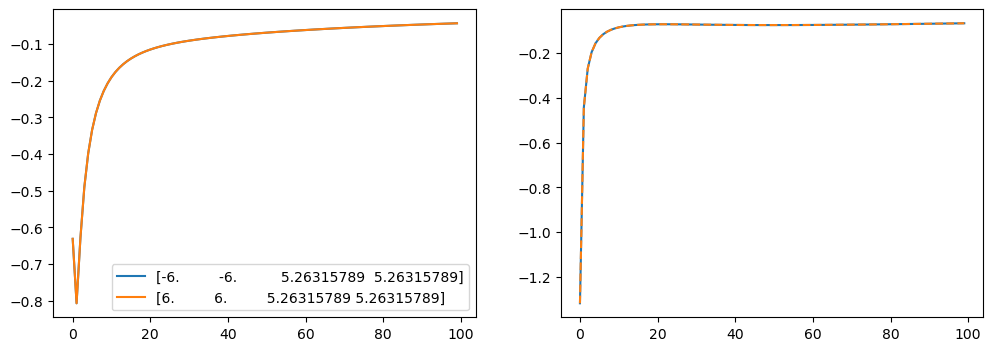

In [52]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

PATH = "../data/test.jld2"
f = h5py.File(PATH, 'r')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sample = 200
g = []
s = []
for gg in f["Set1"]["GImp"][sample,:]:
    g.append(gg[0] + 1j*gg[1])
g = np.array(g)
for ss in f["Set1"]["SImp"][sample,:]:
    s.append(ss[0] + 1j*ss[1])
s = np.array(s)
ax[0].plot(g.imag, label=f["Set1"]["Parameters"][sample][:4])
ax[1].plot(s.imag)

sample = 219
g = []
s = []
for gg in f["Set1"]["GImp"][sample,:]:
    g.append(gg[0] + 1j*gg[1])
g = np.array(g)
for ss in f["Set1"]["SImp"][sample,:]:
    s.append(ss[0] + 1j*ss[1])
s = np.array(s)
ax[0].plot(g.imag, label=f["Set1"]["Parameters"][sample][:4])
ax[1].plot(s.imag, "--")
ax[0].legend()


In [38]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

PATH = "../data/test.jld2"
f = h5py.File(PATH, 'r')

# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
# sample = 219
# g = []
# s = []
# for gg in f["Set1"]["GImp"][sample,:]:
#     g.append(gg[0] + 1j*gg[1])
# g = np.array(g)
# for ss in f["Set1"]["SImp"][sample,:]:
#     s.append(ss[0] + 1j*ss[1])
# s = np.array(s)
# ax[0].plot(g.imag, label=f["Set1"]["Parameters"][sample][:4])
# ax[1].plot(s.imag)

# sample = 180
# g = []
# s = []
# for gg in f["Set1"]["GImp"][sample,:]:
#     g.append(gg[0] + 1j*gg[1])
# g = np.array(g)
# for ss in f["Set1"]["SImp"][sample,:]:
#     s.append(ss[0] + 1j*ss[1])
# s = np.array(s)
# ax[0].plot(g.imag, label=f["Set1"]["Parameters"][sample][:4])
# ax[1].plot(s.imag, "--")
# ax[0].legend()


In [39]:
unique_ek = []
unique_vk = [] 
unique_beta = [] 
for n,para in enumerate(f["Set1"]["Parameters"]):
    if para[0] not in unique_ek:
        unique_ek.append(para[0])
    if para[2] not in unique_vk:
        unique_vk.append(para[2])
    if para[6] not in unique_beta:
        unique_beta.append(para[6])
print(unique_ek)
print(unique_vk)
print(unique_beta)

unique_beta = np.array(unique_beta)
unique_ek = np.array(unique_ek)
unique_vk = np.array(unique_vk)


[-6.0, -5.368421052631579, -4.7368421052631575, -4.105263157894736, -3.4736842105263155, -2.842105263157895, -2.2105263157894743, -1.5789473684210527, -0.9473684210526319, -0.31578947368421106, 0.3157894736842106, 0.9473684210526319, 1.5789473684210522, 2.2105263157894743, 2.842105263157894, 3.4736842105263155, 4.105263157894736, 4.7368421052631575, 5.368421052631579, 6.0]
[0.0, 0.5263157894736842, 1.0526315789473684, 1.5789473684210527, 2.1052631578947367, 2.631578947368421, 3.1578947368421053, 3.6842105263157894, 4.2105263157894735, 4.7368421052631575, 5.263157894736842, 5.7894736842105265, 6.315789473684211, 6.842105263157895, 7.368421052631579, 7.894736842105264, 8.421052631578947, 8.947368421052632, 9.473684210526315, 10.0]
[50.0]


In [75]:
idx_to_para = np.zeros((unique_beta.shape[0], unique_ek.shape[0], unique_vk.shape[0], 3))
data = np.zeros((unique_beta.shape[0], unique_ek.shape[0], unique_vk.shape[0], 2, 100), dtype=complex)
n = 0
for b, beta in enumerate(unique_beta):    
    for e, ek in enumerate(unique_ek):    
        for v, vk in enumerate(unique_vk):    
            idx_to_para[b,e,v] = np.array([beta, ek, vk])

for n,para in enumerate(f["Set1"]["Parameters"]):
    idx = np.argwhere((idx_to_para == np.array([para[6],  para[0], para[2]])).all(-1))[0]

    g = []
    s = []
    for gg in f["Set1"]["GImp"][n,:]:
        g.append(gg[0] + 1j*gg[1])
    g = np.array(g)
    for ss in f["Set1"]["SImp"][n,:]:
        s.append(ss[0] + 1j*ss[1])
    s = np.array(s)

    data[idx[0],idx[1],idx[2],0] = g
    data[idx[0],idx[1],idx[2],1] = s



In [76]:
idx_to_para[0,19,19]





array([50.,  6., 10.])

In [89]:
nb = unique_beta.shape[0]
ne = unique_ek.shape[0]
nv = unique_vk.shape[0]
g_max_e = np.zeros((ne,2))
g_max_v = np.zeros((nv,2))
s_max_e = np.zeros((ne,2))
s_max_v = np.zeros((nv,2))
for b in range(0,nb):
    for e in range(0,ne):
        for v in range(0,nv):
            if data[b,e,v,0,0].imag < g_max_e[v,1]:
                g_max_e[v,0] = e
                g_max_e[v,1] = data[b,e,v,0,0].imag
            if data[b,e,v,0,0].imag < g_max_v[e,1]:
                g_max_v[e,0] = v
                g_max_v[e,1] = data[b,e,v,0,0].imag

            if data[b,e,v,1,0].imag < s_max_e[v,1]:
                s_max_e[v,0] = e
                s_max_e[v,1] = data[b,e,v,1,0].imag
            if data[b,e,v,1,0].imag < s_max_v[e,1]:
                s_max_v[e,0] = v
                s_max_v[e,1] = data[b,e,v,1,0].imag

# print(ne,nv)
# print(data.shape)
# print(g_max_v)
# print()
# print(g_max_e)

# print(s_max_v)
# print()
# print(s_max_e)

[50. -6. 10.]
[50.  6. 10.]


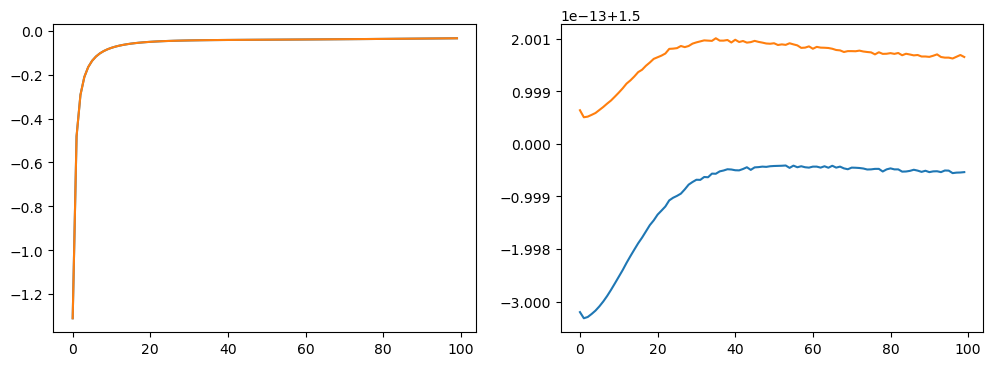

In [91]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
# for n in range(0,20,8):
#     ax[0].plot(data[0,n,14,0].imag)
#     print(idx_to_para[0,n,14])
# ax[0].plot(data[0,19,14,0].imag)
# print(idx_to_para[0,19,14])

v = 19
e1 = 0
e2 = 19
ax[0].plot(data[0,e1,v,0].imag)
ax[0].plot(data[0,e2,v,0].imag)
ax[1].plot(data[0,e1,v,1].imag)
ax[1].plot(data[0,e2,v,1].imag)
print(idx_to_para[0,e1,v])
print(idx_to_para[0,e2,v])


In [47]:
sample = 100
f["Set1"]["Parameters"][sample][:4]

array([-6.        , -6.        ,  2.63157895,  2.63157895])